# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key = '623cc02834fde979f27ab03258d50a26'



### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key+ '&q='+city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qarqaraly
Processing Record 2 of Set 1 | hood river
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | kailua-kona
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | ngama
Processing Record 12 of Set 1 | camalu
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | ahau
City not found. Skipping...
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | port saint john's
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | afaahiti
Proc

Processing Record 39 of Set 4 | turochak
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | taiohae
City not found. Skipping...
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | callao
Processing Record 44 of Set 4 | odienne
Processing Record 45 of Set 4 | el carmen
Processing Record 46 of Set 4 | cill airne
Processing Record 47 of Set 4 | neyriz
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | nantucket
Processing Record 0 of Set 5 | yarmouth
Processing Record 1 of Set 5 | gering
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | kapuskasing
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | trairi
Processing Record 6 of Set 5 | tyukalinsk
Processing Record 7 of Set 5 | kabinda
Processing Record 8 of Set 5 | kapoeta
Processing Record 9 of Set 5 | jeddah
Processing Record 10 of Set 5 | tsiombe
Processing Record 11 of Set 5 | hasaki
Processing Record 12 of Set 5 | smithers
Proces

Processing Record 30 of Set 8 | taro
Processing Record 31 of Set 8 | miles city
Processing Record 32 of Set 8 | pandan
Processing Record 33 of Set 8 | kilju
Processing Record 34 of Set 8 | suihua
Processing Record 35 of Set 8 | prey veng
Processing Record 36 of Set 8 | ingeniero jacobacci
Processing Record 37 of Set 8 | iron mountain
Processing Record 38 of Set 8 | lorengau
Processing Record 39 of Set 8 | punalur
Processing Record 40 of Set 8 | viqueque
Processing Record 41 of Set 8 | sumbawa besar
Processing Record 42 of Set 8 | vila velha
Processing Record 43 of Set 8 | salalah
Processing Record 44 of Set 8 | lulea
Processing Record 45 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 46 of Set 8 | snyder
Processing Record 47 of Set 8 | puerto deseado
Processing Record 48 of Set 8 | ribeira brava
Processing Record 49 of Set 8 | vavuniya
Processing Record 0 of Set 9 | la passe
Processing Record 1 of Set 9 | fort st. john
Processing Record 2 of Set 9 | tefenni
Proc

Processing Record 19 of Set 12 | mata-utu
Processing Record 20 of Set 12 | chul'man
Processing Record 21 of Set 12 | rockland
Processing Record 22 of Set 12 | laojunmiao
Processing Record 23 of Set 12 | zahedan
Processing Record 24 of Set 12 | truth or consequences
Processing Record 25 of Set 12 | flying fish cove
Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | jayapura
Processing Record 28 of Set 12 | beloyarskiy
Processing Record 29 of Set 12 | starobesheve
Processing Record 30 of Set 12 | santa marta de ortigueira
Processing Record 31 of Set 12 | brisas de zicatela
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | cambria
Processing Record 35 of Set 12 | oltinko'l
Processing Record 36 of Set 12 | barcelos
Processing Record 37 of Set 12 | kitimat
Processing Record 38 of Set 12 | karmaskaly
Processing Record 39 of Set 12 | auki
Processing Record 40 of Set 12 | pizarro
Processing Record 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qarqaraly,49.4058,75.4742,278.92,56,3,3.32,KZ,1697670827
1,hood river,45.7054,-121.5215,299.36,48,0,0.89,US,1697670827
2,adamstown,-25.0660,-130.1015,295.93,78,57,3.34,PN,1697670828
3,kailua-kona,19.6406,-155.9956,302.13,79,40,5.14,US,1697670538
4,albany,42.6001,-73.9662,285.50,83,96,0.97,US,1697670598


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qarqaraly,49.4058,75.4742,278.92,56,3,3.32,KZ,1697670827
1,hood river,45.7054,-121.5215,299.36,48,0,0.89,US,1697670827
2,adamstown,-25.0660,-130.1015,295.93,78,57,3.34,PN,1697670828
3,kailua-kona,19.6406,-155.9956,302.13,79,40,5.14,US,1697670538
4,albany,42.6001,-73.9662,285.50,83,96,0.97,US,1697670598


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

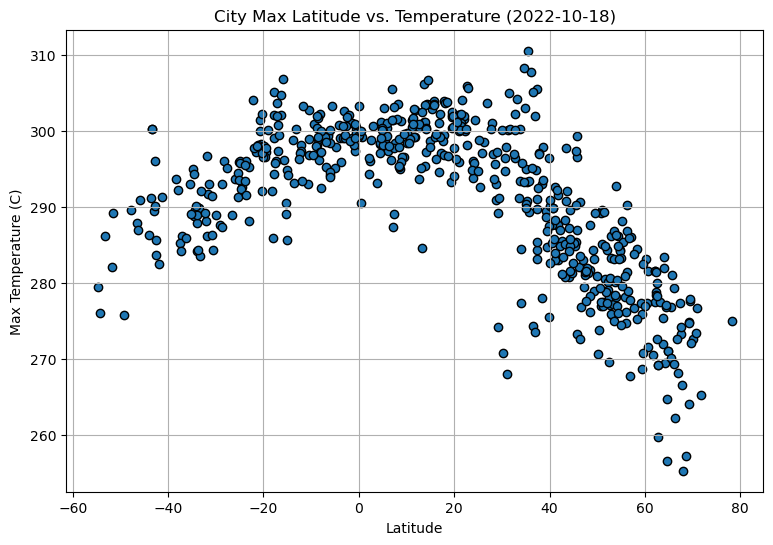

In [19]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
mt = city_data_df["Max Temp"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(lat, mt, edgecolor='black')
plt.grid()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

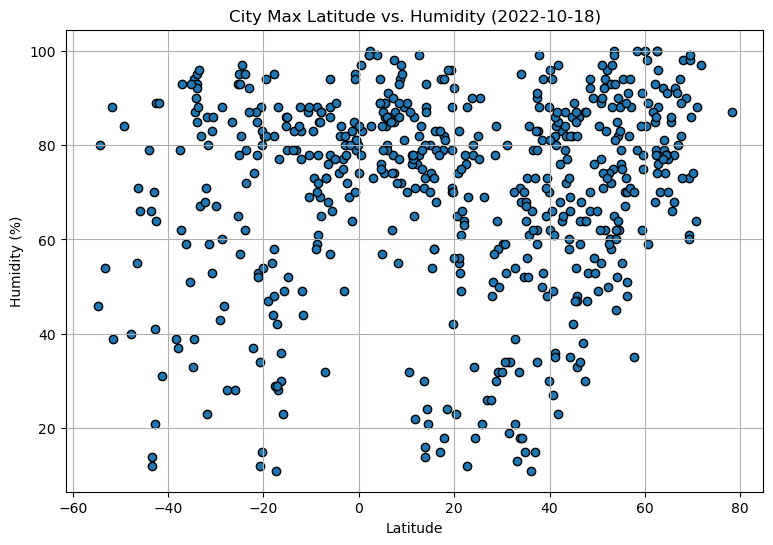

In [20]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hd = city_data_df["Humidity"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(lat, hd, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

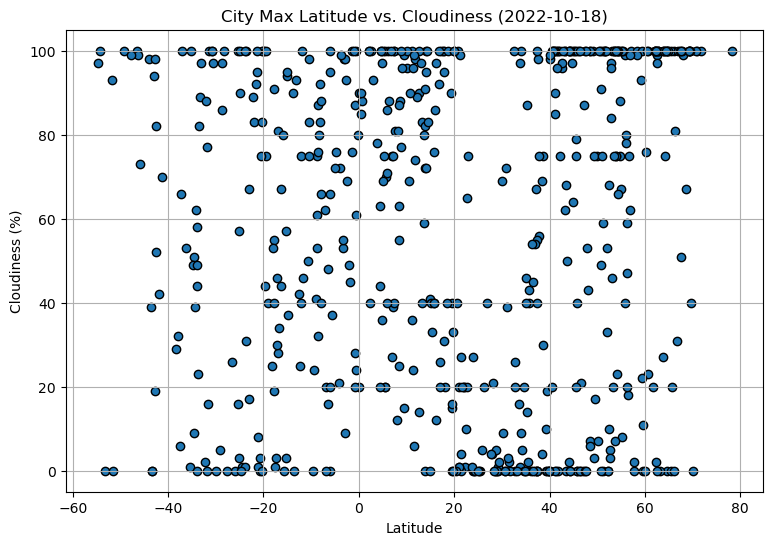

In [21]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cld = city_data_df["Cloudiness"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat, cld, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

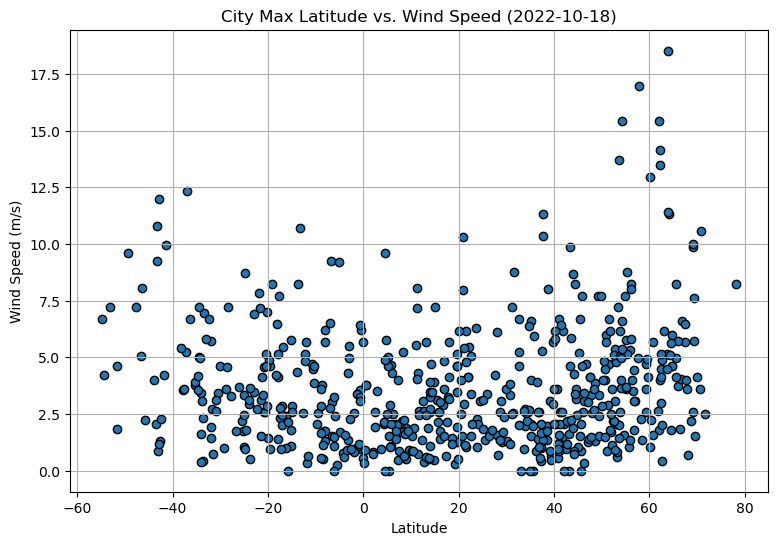

In [22]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
ws = city_data_df["Wind Speed"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat, ws, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
import numpy as np

def linearReg(x_values, y_values, xlabel, ylabel, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    correlation = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {round(correlation[0], 4)}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq, ( (np.mean(x_values) * 0.8) , (np.mean(y_values) * 0.8) ), color='r')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"../output_data/LinReg{label}.png")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qarqaraly,49.4058,75.4742,278.92,56,3,3.32,KZ,1697670827
1,hood river,45.7054,-121.5215,299.36,48,0,0.89,US,1697670827
3,kailua-kona,19.6406,-155.9956,302.13,79,40,5.14,US,1697670538
4,albany,42.6001,-73.9662,285.50,83,96,0.97,US,1697670598
6,north bend,43.4065,-124.2243,297.73,82,0,4.63,US,1697670829


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,295.93,78,57,3.34,PN,1697670828
5,waitangi,-43.9535,-176.5597,286.38,79,98,4.02,NZ,1697670829
9,isangel,-19.5500,169.2667,297.21,94,75,4.63,VU,1697670830
14,bredasdorp,-34.5322,20.0403,288.80,94,51,5.01,ZA,1697670756
16,port-aux-francais,-49.3500,70.2167,275.76,84,100,9.59,TF,1697670832


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8207


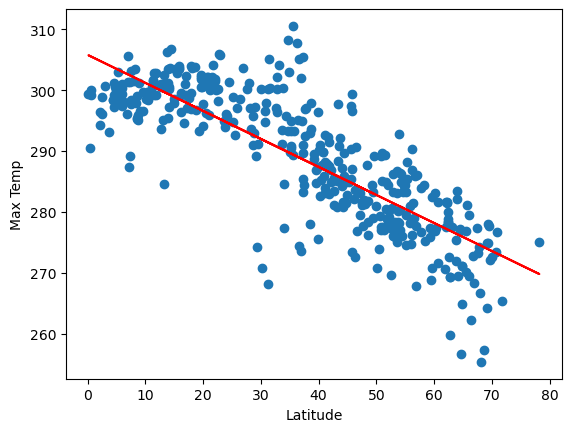

In [26]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots

linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='North1'
         )

The r-value is: 0.7255


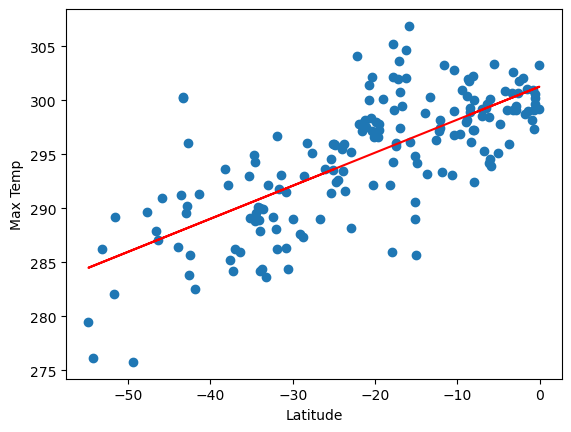

In [27]:
# Linear regression on Southern Hemisphere
linearReg(southern_hemi_df["Lat"], 
          southern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='South1'
         )

**Discussion about the linear relationship: 
These scatter plots show that the closer a city is to the equator, the higher the max temperature is. Both of these charts have extremely high correlation which leads us to believe that this tends to be the case regardless of city and there are relatively few exceptions or outliers. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0745


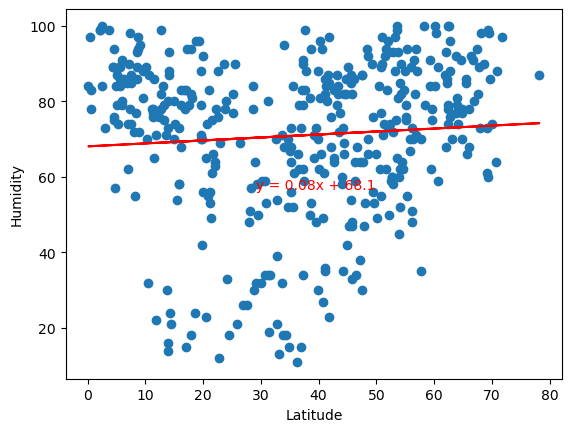

In [28]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Humidity"], 
          xlabel="Latitude", 
          ylabel="Humidity",
          label='North2'
         )

The r-value is: 0.2


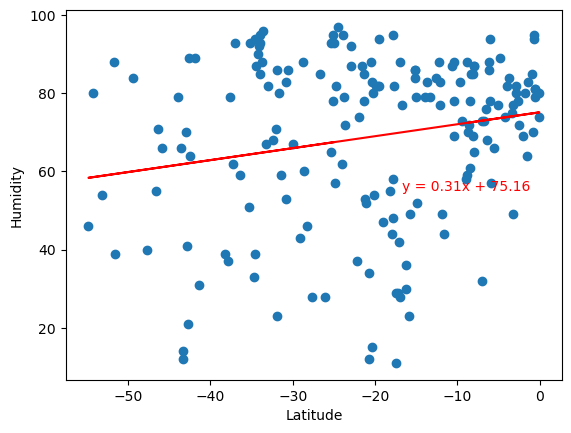

In [29]:
# Southern Hemisphere

linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Humidity"],
          xlabel="Latitude",
          ylabel="Humidity",
          label='South2'
         )

**Discussion about the linear relationship:
These scatter plots show that cities closer to the equator tend to be more humid. However, there is weak correlation and an exceptional numbner of outliers which tells us that this is not a reliable conclusion. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0753


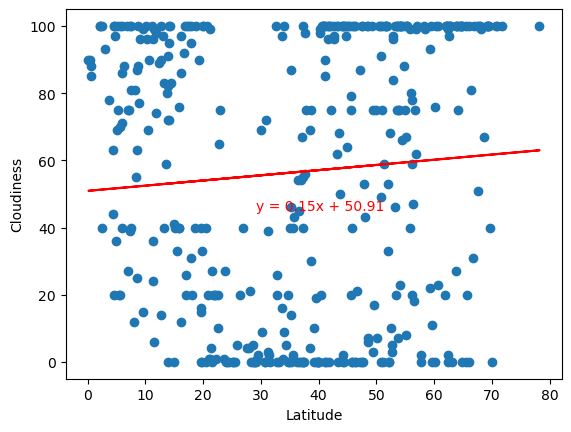

In [30]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Cloudiness"], 
          xlabel="Latitude", 
          ylabel="Cloudiness",
          label='North3'
         )

The r-value is: 0.0013


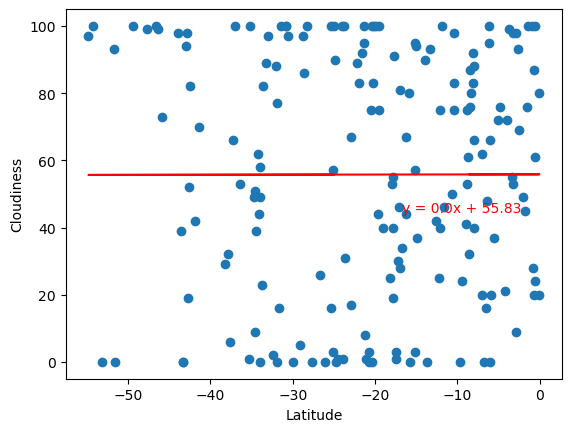

In [31]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Cloudiness"],
          xlabel="Latitude",
          ylabel="Cloudiness",
          label='South3'
         )

**Discussion about the linear relationship:
This scatterplot shows the relationship between a cities lattitude and cloudiness. There is basically no correlation at all between these two variables which gives us data that is inconclusive. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.3122


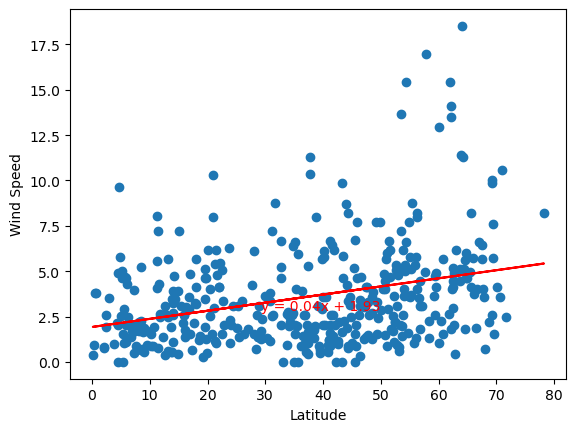

In [32]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Wind Speed"], 
          xlabel="Latitude", 
          ylabel="Wind Speed",
          label='North4'
         )

The r-value is: -0.2877


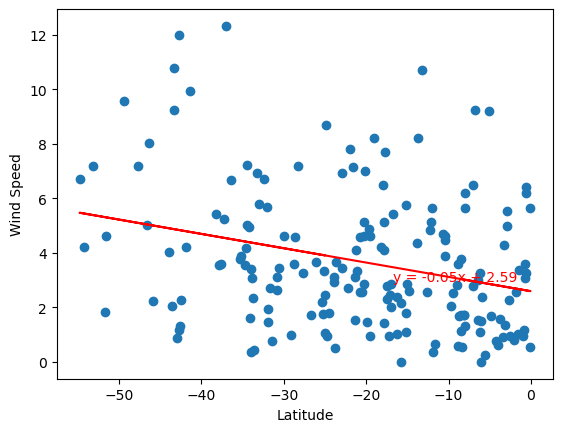

In [33]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Wind Speed"],
          xlabel="Latitude",
          ylabel="Wind Speed",
          label='South4'
         )

**Discussion about the linear relationship:
There appears to be some correlation between wind speed and lattitude but, once again the correlation is weak and will most likely not yield actionable insights. There is more correlation between lattitude and wind speed than cloudiness or wind speed, but the increase is insignificant. 